In [1]:
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 13.4 MB/s eta 0:00:00


**Import needed libreries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import cross_validate
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

import pycountry_convert as pc

**Upload file**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving randomdata.csv to randomdata.csv


In [4]:
data = pd.read_csv('randomdata.csv')

In [5]:
data.head()

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes
2,2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,256,1875,0.136533,No,18,Yes
3,3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,233,1875,0.124267,No,24,Yes
4,4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,239,1875,0.127467,No,21,Yes


In [105]:
df = data.copy().drop(["Unnamed: 0", "Customer Name", "Customer_Address", "Company Name"], axis = 1)
df.head()

,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,Travel,Low,377,4794,0.078640,No,21,Yes
1,Medical,High,1440,14390,0.100069,No,24,Yes
2,Phone,Medium,256,1875,0.136533,No,18,Yes
3,Phone,Medium,233,1875,0.124267,No,24,Yes
4,Phone,Medium,239,1875,0.127467,No,21,Yes


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim Amount,200000.0,1120.478840,796.660796,1.000000,245.000000,1390.000000,1844.000000,2299.00000
Category Premium,200000.0,8963.783895,6114.737202,399.000000,1875.000000,14390.000000,14390.000000,14390.00000
Premium/Amount Ratio,200000.0,0.125024,0.034742,0.002506,0.106741,0.125122,0.143155,0.24812
BMI,200000.0,23.007205,3.164976,18.000000,20.000000,23.000000,26.000000,28.00000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Claim Reason          200000 non-null  object 
 1   Data confidentiality  200000 non-null  object 
 2   Claim Amount          200000 non-null  int64  
 3   Category Premium      200000 non-null  int64  
 4   Premium/Amount Ratio  200000 non-null  float64
 5   Claim Request output  200000 non-null  object 
 6   BMI                   200000 non-null  int64  
 7   Churn                 200000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.2+ MB


In [111]:
df.duplicated().sum()

np.int64(180627)

In [113]:
df.columns

Index(['Claim Reason', 'Data confidentiality', 'Claim Amount',
       'Category Premium', 'Premium/Amount Ratio', 'Claim Request output',
       'BMI', 'Churn'],
      dtype='object')

In [115]:
X = df.drop(["Churn"], axis = 1)
y = df["Churn"]

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [117]:
# Identify categorical columns in X
categorical_cols_X = X.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column in X
for col in categorical_cols_X:
    X[col] = le.fit_transform(X[col])

# Apply LabelEncoder to y, assuming it's categorical (like 'Churn')
y = le.fit_transform(y)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Fit the data (train the model)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression(random_state=42)

In [120]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [121]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

In [122]:
scores = cross_validate(log_reg, X_train,
                            y_train, cv=10, scoring=scoring)
scores

{'fit_time': array([2.09866762, 2.43854952, 1.77350831, 1.55538869, 1.79462528,
        2.18321013, 1.57878375, 1.45682478, 1.5109818 , 1.45313358]),
 'score_time': array([0.04262996, 0.0227015 , 0.00921583, 0.00977325, 0.01884437,
        0.00997329, 0.01736283, 0.00980544, 0.01272011, 0.01069617]),
 'test_acc': array([0.9841875, 0.9731875, 0.98225  , 0.9856875, 0.9825625, 0.963125 ,
        0.982    , 0.9810625, 0.966125 , 0.9831875]),
 'test_prec_macro': array([0.98034028, 0.97114904, 0.9781187 , 0.98106812, 0.97822001,
        0.95711197, 0.97776966, 0.97651466, 0.9643826 , 0.97947354]),
 'test_rec_macro': array([0.98595506, 0.97090582, 0.98406448, 0.98875356, 0.98471499,
        0.96432425, 0.98390485, 0.98324181, 0.96230396, 0.98461693]),
 'test_f1_macro': array([0.98301908, 0.9710272 , 0.98094578, 0.98466421, 0.98129239,
        0.96048448, 0.98068148, 0.9796888 , 0.96332628, 0.98193754])}

In [123]:
import numpy as np

for key in scores:
    if "test" in key:
        print(f"{key}: {np.mean(scores[key]):.3f}")


test_acc: 0.978
test_prec_macro: 0.974
test_rec_macro: 0.979
test_f1_macro: 0.977


These metrics indicate a highly effective and robust model that performs consistently well across all categories. With a 97.8% accuracy, the model is correct the vast majority of the time, but the high Macro F1 score (0.977) is even more significant; it proves that the model treats all classes equally and isn't simply achieving high accuracy by ignoring minority classes. Furthermore, the negligible gap between Precision (0.974) and Recall (0.979) demonstrates that the model is unbiased, striking an almost perfect balance between avoiding false alarms (false positives) and missing actual targets (false negatives).

In [124]:
from sklearn.metrics import confusion_matrix
ypredTrain = log_reg.predict(X_train) # Make predictions on training data
confusion_matrix(y_train, ypredTrain) # Compare predictions vs real answers

array([[57680,   512],
       [ 2262, 99546]])

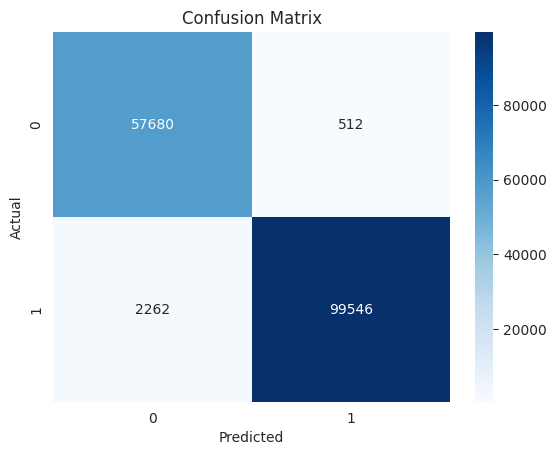

In [125]:
# plot the confusion matrix
cm = confusion_matrix(y_train, ypredTrain)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model performs extremely well, correctly identifying 57,680 non-churners and 99,546 churners. Only 512 loyal customers were mistakenly flagged as churn risks (false positives), while 2,262 actual churners were missed (false negatives). Both error rates are very low, indicating that the model effectively targets customers who are likely to leave while avoiding unnecessary retention efforts on those who will stay. Overall, the model provides strong predictive accuracy and is highly reliable for supporting insurance churn management decisions.

In [126]:
probs = log_reg.predict_proba(X_test)
probs[:,1]

array([0.99966744, 1.        , 1.        , ..., 1.        , 0.99999999,
       0.9999985 ])

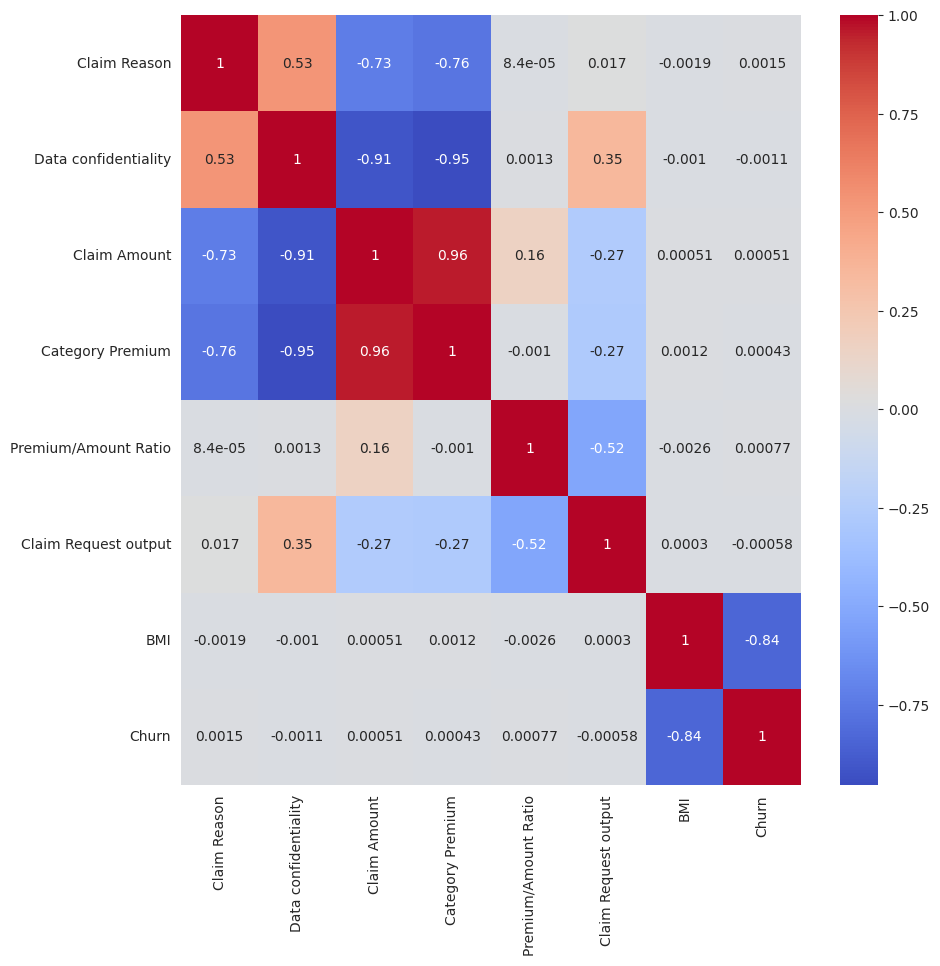

In [127]:
# Convert X to DataFrame
X_df = pd.DataFrame(X, columns=log_reg.feature_names_in_)

# Convert y to Series
y_series = pd.Series(y, name="Churn")

# Combine
df1 = pd.concat([X_df, y_series], axis=1)

# Now make correlation matrix
df_corr = df1.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()


The correlation matrix shows that the churn rate has the highest correlation with the BMI. This justifies the selection of BMI for the horizontal axis of the Sigmoid graph.

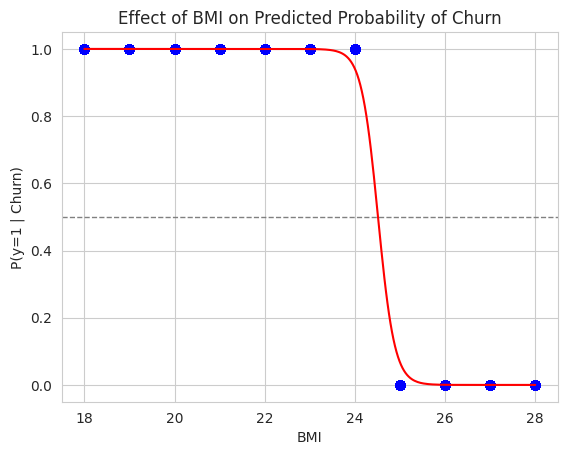

In [128]:
# Plot sigmoid curve
x_range = np.linspace(X_test['BMI'].min(), X_test['BMI'].max(), 300)

# Get all feature names in the order the model was trained on (from X_train)
feature_names = X_train.columns

# Create a dictionary to hold mean values for each feature
mean_values = {col: X_test[col].mean() for col in feature_names}

# Create a DataFrame where each column is filled with its mean value, replicated 'len(x_range)' times
# This ensures all columns are present and in the correct order as per feature_names
X_plot = pd.DataFrame([mean_values] * len(x_range), columns=feature_names)

# Now, overwrite the 'BMI' column with the x_range values
X_plot['BMI'] = x_range

y_prob = log_reg.predict_proba(X_plot)[:, 1]

#Plot sigmoid curve
plt.plot(x_range, y_prob, color='red')
# Scatter points
plt.scatter(X_test['BMI'], y_test, color='blue', alpha=0.4, label='Actual data (0 or 1)', s=40)
# Add a horizontal line at 0.5
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Decision threshold (0.5)')
plt.xlabel('BMI')
plt.ylabel('P(y=1 | Churn)')
plt.title('Effect of BMI on Predicted Probability of Churn')
plt.show()

In [129]:
 from sklearn import metrics


In [130]:
# probability of class = 1
probs = log_reg.predict_proba(X_test)[:, 1]
probs

array([0.99966744, 1.        , 1.        , ..., 1.        , 0.99999999,
       0.9999985 ])

In [131]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

In [132]:
# False positive rate
fpr

array([0.        , 0.        , 0.        , ..., 0.9986929 , 0.99931205,
       1.        ])

In [133]:
 # True positive rate
tpr

array([0.        , 0.04465127, 0.12456802, ..., 1.        , 1.        ,
       1.        ])

In [134]:
# Thresholds
thresholds

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       1.24314847e-10, 1.24227757e-10, 1.24140728e-10])

In [135]:
def auc_score(a, b):
  auc = metrics.roc_auc_score(a, b)
  print("AUC =", auc)

In [136]:
auc_score(y_test, probs)

AUC = 0.9984018844694857


An AUC of **0.9984** indicates exceptionally strong model performance, meaning the classifier can distinguish churners from non-churners with 99.84% accuracy across all possible decision thresholds. In practical terms, the model is almost perfectly ranking customers by their churn risk, with minimal overlap between the two groups. This level of AUC is extremely rare in real-world datasets and suggests that the model provides near-flawless separation, making it highly effective for prioritizing retention efforts and supporting insurance decision-making.

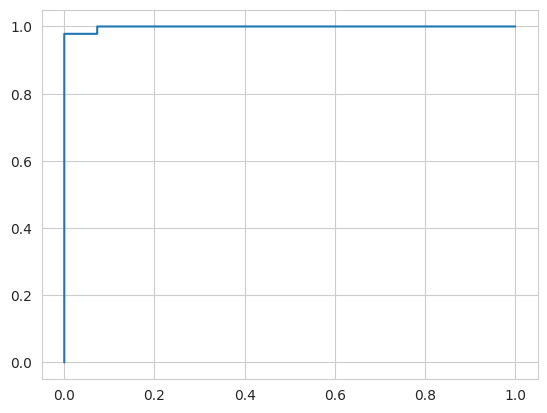

In [137]:
plt.plot(fpr, tpr)

In [140]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

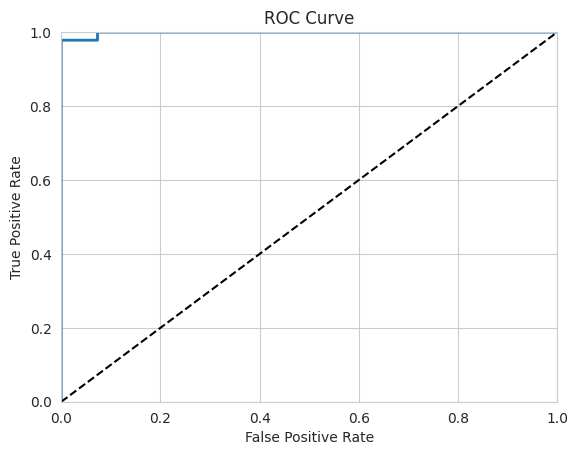

In [141]:
plot_roc_curve(fpr, tpr)